### Plotter, loader and handler for RNAseq data from other retinal cells in zebrafish

Müller Glia: [Charlton-Perkins, 2019](https://www-ncbi-nlm-nih-gov.ezproxy.nihlibrary.nih.gov/pubmed/30924555)  
> Issues:
>    - in original paper, data aligned to GRCz10 not GRCz11; tried to fix by remapping ENSEMBLIDs in table to GRCz11
>    - Considered downloading original files and remapping but not sure it's worth it
>    - Most photoreceptor genes are present in alternating samples, which could reflect circadian variations or inconsistencies in collection
>    - Decided to modify table to include baseMean (as mean of MG192 samples only), and to de-transform from log2 into linear scale
>    - Also included differential expression analysis for 192hpf in new table
>    - For heatmaps, will accept that inter-sample variability can be ignored and calculate mean to declutter plot (although 48MG1 is consistently weird)
     
Rods: [Sun, 2018](https://www-ncbi-nlm-nih-gov.ezproxy.nihlibrary.nih.gov/pubmed/29422031)
>
> - top50 rod-enriched transcripts are 95% consistent with my RNAseq
> - counts are in log2 CPM


In [3]:
# External libraries
import numpy as np
import pandas as pd
import math
import IPython
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import importlib
import svgutils
from svgutils.compose import *

from fx_RNAseq import *
def findgene_glia(genename):
    dPath = "~/Documents/LiLab/RNAseq/zfMullerGlia_2018Charlton/" #directory path
#     fPath = "glia_23615_sup-0006-tables2.csv" #file path
    fPath = "glia8dpf_DEGcounts.csv" #file path
    tempPath = "temp.txt" # temporary file to store values
    !head -1 {dPath + fPath} > {dPath + tempPath}
    # EXACT MATCH ONLY by matching word (-w) and only at the start of each line (^) which corresponds to the symbol
    !grep -w ^$genename {dPath + fPath} >> {dPath + tempPath}
    gdf = pd.read_csv(dPath + tempPath)
    return gdf

def findgenelist_glia(genename):
    dPath = "~/Documents/LiLab/RNAseq/zfMullerGlia_2018Charlton/" #directory path
#     fPath = "glia_23615_sup-0006-tables2.csv" #file path
    fPath = "glia8dpf_DEGcounts.csv" #file path
    tempPath = "temp.txt" # temporary file to store values
    !head -1 {dPath + fPath} > {dPath + tempPath}
    # EXACT MATCH ONLY by matching word (-w) and only at the start of each line (^) which corresponds to the symbol
    !grep ^$genename {dPath + fPath} >> {dPath + tempPath}
    gdf = pd.read_csv(dPath + tempPath)
    return gdf

def plotBars_glia(genename):
    gdf = findgene_glia(genename)
    n = np.arange(1,19) # GFP+
    n = np.append(n, 19.5 + np.arange(1,19)) # GFP-
    h_start = 5
    h_end = 41
#     h = np.power(2,(gdf.iloc[0,h_start:h_end]))
    h = gdf.iloc[0,h_start:h_end]
    return n, h

#glia Colors
gC = {
    'm48' : '#c7ffec',
    'm60' : '#94ffdb',
    'm72' : '#57ffc7',
    'm96' : '#2effb9',
    'm120': '#05ffac',
    'm192': '#00d68f',
    
    'c48' : '#e3e3e3',
    'c60' : '#c9c9c9',
    'c72' : '#ababab',
    'c96' : '#969696',
    'c120': '#828282',
    'c192': '#6b6b6b',
    
    'plt' : '',
}

gC['plt']=[
    gC['m48'],gC['m48'],gC['m48'],
    gC['m60'],gC['m60'],gC['m60'],
    gC['m72'],gC['m72'],gC['m72'],
    gC['m96'],gC['m96'],gC['m96'],
    gC['m120'],gC['m120'],gC['m120'],
    gC['m192'],gC['m192'],gC['m192'],
    gC['c48'],gC['c48'],gC['c48'],
    gC['c60'],gC['c60'],gC['c60'],
    gC['c72'],gC['c72'],gC['c72'],
    gC['c96'],gC['c96'],gC['c96'],
    gC['c120'],gC['c120'],gC['c120'],
    gC['c192'],gC['c192'],gC['c192'],
]

def findgene_rods(genename):
    dPath = "~/Documents/LiLab/RNAseq/zfRods_Sun2018/" #directory path
#     fPath = "glia_23615_sup-0006-tables2.csv" #file path
    fPath = "zfRods.csv" #file path
    tempPath = "temp.txt" # temporary file to store values
    !head -1 {dPath + fPath} > {dPath + tempPath}
    # EXACT MATCH ONLY by matching word (-w) and only at the start of each line (^) which corresponds to the symbol
    !grep -w ^$genename {dPath + fPath} >> {dPath + tempPath}
    gdf = pd.read_csv(dPath + tempPath)
    return gdf

def findgenelist_rods(genename):
    dPath = "~/Documents/LiLab/RNAseq/zfRods_Sun2018/" #directory path
#     fPath = "glia_23615_sup-0006-tables2.csv" #file path
    fPath = "zfRods.csv" #file path
    tempPath = "temp.txt" # temporary file to store values
    !head -1 {dPath + fPath} > {dPath + tempPath}
    # EXACT MATCH ONLY by matching word (-w) and only at the start of each line (^) which corresponds to the symbol
    !grep ^$genename {dPath + fPath} >> {dPath + tempPath}
    gdf = pd.read_csv(dPath + tempPath)
    return gdf

def plotBars_rods(genename):
    gdf = findgene_rods(genename)
    n = np.arange(1,5) # GFP+
    n = np.append(n, 4.5 + np.arange(1,5)) # GFP-
    h_start = 7
    h_end = 15
#     h = np.power(2,(gdf.iloc[0,h_start:h_end]))
    h = gdf.iloc[0,h_start:h_end].values
    return n, h

#rod Colors
rC = {
    'r' : '#747474',
    'c': '#dac910',
    'plt' : '',
}

rC['plt']=[
    rC['r'],rC['r'],rC['r'],rC['r'],
    rC['c'],rC['c'],rC['c'],rC['c'],
]




# df = pd.read_csv("~/Documents/LiLab/RNAseq/zfMullerGlia_2018Charlton/glia8dpf_DEGcounts.csv")

print('LOADED')



LOADED


In [118]:
def findgene_sqcones(genename):
    dPath = "~/Documents/LiLab/RNAseq/sqCones_Kunze/" #directory path
    fPath = "sqConesAwHib_Adult.csv" #file path
    tempPath = "temp.txt" # temporary file to store values
    !head -1 {dPath + fPath} > {dPath + tempPath}
    # EXACT MATCH ONLY by matching word (-w) and only at the start of each line (^) which corresponds to the symbol
    !grep -w ^$genename {dPath + fPath} >> {dPath + tempPath}
    gdf = pd.read_csv(dPath + tempPath)
    return gdf

def findgenelist_sqcones(genename):
    dPath = "~/Documents/LiLab/RNAseq/sqCones_Kunze/" #directory path
    fPath = "sqConesAwHib_Adult.csv" #file path
    tempPath = "temp.txt" # temporary file to store values
    !head -1 {dPath + fPath} > {dPath + tempPath}
    # EXACT MATCH ONLY by matching word (-w) and only at the start of each line (^) which corresponds to the symbol
    !grep ^$genename {dPath + fPath} >> {dPath + tempPath}
    gdf = pd.read_csv(dPath + tempPath)
    return gdf

def plotBars_sqcones(genename):
    gdf = findgene_sqcones(genename)
    n = np.arange(1,8) # GFP+
    n = np.append(n, 7.5 + np.arange(1,7)) # GFP-
    h_start = 8
    h_end = 21
#     h = np.power(2,(gdf.iloc[0,h_start:h_end]))
    h = gdf.iloc[0,h_start:h_end].values
    return n, h

#squirrel Colors
sqC = {
    's' : '#4669F2',
    'sHib' : '#548ced',
    'm' : '#04CD22',
    'mHib' : '#53e477',
    'plt' : '',
}

sqC['plt']=[
    sqC['s'],sqC['s'],sqC['s'],sqC['s'],sqC['s'],
    sqC['sHib'],sqC['sHib'],
    sqC['m'],sqC['m'],sqC['m'],
    sqC['mHib'],sqC['mHib'],sqC['mHib'],
]


def formatFigure_sqcones(genename, figH, axH, plotH):
    font_path = '/System/Library/Fonts/Avenir.ttc'
    fontTicks = font_manager.FontProperties(fname=font_path, size=24)
    fontLabels = font_manager.FontProperties(fname=font_path, size=28)
    fontTitle = font_manager.FontProperties(fname=font_path, size=28)
    
    axH.set_xticks([3,6.5,10,13])
    axH.set_xticklabels(['S','S_hib','M','M_hib']);
    axH.ticklabel_format(style='sci',axis='y',scilimits=(0,2))
#     axH.set_ylabel('norm. counts', fontproperties=fontLabels)
    axH.set_ylabel('counts', fontproperties=fontLabels)
#     axH.set_xlabel('Squirrel cones', fontproperties=fontLabels)
    axH.set_title(genename, fontproperties=fontTitle)
    axH.spines['top'].set_visible(False)
    axH.spines['right'].set_visible(False)
    
    for label in (axH.get_xticklabels() + axH.get_yticklabels()):
        label.set_fontproperties(fontTicks)
    axH.tick_params(axis = 'both', which = 'major', labelsize = 24)
    axH.yaxis.offsetText.set_fontsize(24)

In [112]:
gdf = pd.read_csv("~/Documents/LiLab/RNAseq/sqCones_Kunze/" + "temp.txt")
gdf

,symbol,genename,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Aw_S-Cone1,Aw_S-Cone2,...,Aw_S-Cone4,Aw_S-Conex5,Hb_S-Cone2,Hb_S-Cone3,Aw_M-Cone1,Aw_M-Cone2,Aw_M-Cone3,Hb_M-Cone1,Hb_M-Cone2,Hb_M-Cone3
0,rho,ras homolog family member G,73,1.02,0.61,1.67,NaN,NaN,0,714.80,...,0.00,55.02,0.28,48.99,23.75,0.76,1.05,17.57,0.00,785.66
1,rhob,ras homolog family member B,17,-0.16,0.61,-0.26,0.8,1.0,0,48.96,...,16.29,0.00,0.28,38.44,59.38,0.00,0.00,22.85,1.23,8.08


In [115]:
gdf = findgenelist_sqcones('opn')
# gdf.iloc[0,8:21]
gdf

,symbol,genename,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Aw_S-Cone1,Aw_S-Cone2,...,Aw_S-Cone4,Aw_S-Conex5,Hb_S-Cone2,Hb_S-Cone3,Aw_M-Cone1,Aw_M-Cone2,Aw_M-Cone3,Hb_M-Cone1,Hb_M-Cone2,Hb_M-Cone3
0,opn1sw,opsin 1 (cone pigments) short-wave-sensitive (...,"13,046",-10.15,0.33,-30.76,0.00,0.0,20911.969089,17830.738333,...,14762.005358,44239.562702,31722.934583,11477.731376,0.000000,7.563526,14.713856,12.595139,14.115308,12.643632
1,opn3,opsin 3,53,-0.82,0.62,-1.31,0.19,1.0,253.580870,0.000000,...,61.538522,38.683721,198.561895,29.392720,11.876556,83.576964,0.000000,0.000000,0.000000,10.536360
2,opn4,opioid receptor kappa 1,0,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,opn5,opioid receptor-like 1,0,-0.03,0.45,-0.06,0.95,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.378176,0.000000,0.000000,0.000000,0.000000


In [104]:
genename = 'opn1sw'
n,h = plotBars_sqcones(genename)
h

array([762.01,  44.  , 239.56,  31.  , 722.93,  11.  , 477.73,   0.  ,
         7.56,  14.71,  12.6 ,  14.12,  12.64])

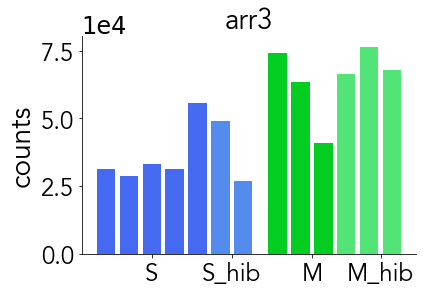

In [122]:
genename = 'arr3'
n,h = plotBars_sqcones(genename)
fH, ax = plt.subplots()
pH = plt.bar(n,h, width=0.8, bottom=None, align='center', data=None, color=sqC['plt'])
formatFigure_sqcones(genename, fH, ax, pH)

In [14]:
gdf = findgenelist_rods('rho')
# gdf = findgenelist_glia('rho')
# gdf = findgene_rods('saga')
gdf
# gdf.iloc[0,7:14]

,symbol,genename,log2FoldChange,baseMean,LR,pvalue,padj,GFPpos1,GFPpos2_2,GFPpos2,GFPpos5_2,GFPneg1,GFPneg2,GFPneg2_2,GFPneg5_2
0,rho,rhodopsin,3.2147,12.2770,62.2975,0.0000,0.0000,5833.782666,9860.290853,8398.384020,11078.004408,423.467075,547.057387,1979.633808,1578.952689
1,rhoaa,"ras homolog gene family, member Aa",-0.5224,3.6391,1.3247,0.2497,0.4893,7.143024,4.820087,14.454628,14.205219,12.691499,12.788927,16.207528,13.371767
2,rhoac,"ras homolog gene family, member Ac",0.0044,2.9654,0.0001,0.9933,0.9974,7.894921,3.213391,11.759698,4.907257,1.787535,6.173965,10.997966,12.287570
3,rhoad,"ras homolog gene family, member Ad",-0.2878,1.6733,0.1322,0.7161,0.8627,4.323409,1.606696,1.224968,1.549660,4.290084,5.071471,0.578840,1.445596
4,rhoae,"ras homolog gene family, member Ae",-0.8808,5.3130,6.7205,0.0095,0.0516,37.218913,43.782455,18.374527,15.754879,62.027469,61.078152,39.939980,35.417112
5,rhobtb1,Rho-related BTB domain containing 1,-0.4773,4.0497,1.4578,0.2273,0.4629,9.586690,21.288717,8.574779,14.980049,21.629175,9.701945,16.786369,26.382135
6,rhobtb2a,Rho-related BTB domain containing 2a,-1.1270,3.0928,4.8630,0.0274,0.1139,6.391126,1.606696,9.064767,2.324490,16.981584,16.978403,6.367243,2.891193
7,rhobtb2b,Rho-related BTB domain containing 2b,-1.8595,1.8248,3.7339,0.0533,0.1821,0.187974,1.606696,4.164893,0.774830,5.898866,2.204987,4.630722,5.059587
8,rhogc,"ras homolog gene family, member Gc",-1.9419,1.4090,3.8279,0.0504,0.1754,2.255692,0.000000,0.000000,1.807937,4.111331,2.645985,0.000000,5.420987
9,rhol,"rhodopsin, like",2.4220,5.0938,33.6836,0.0000,0.0000,27.444249,62.259454,84.032839,48.556020,4.111331,5.512469,21.417091,15.901561


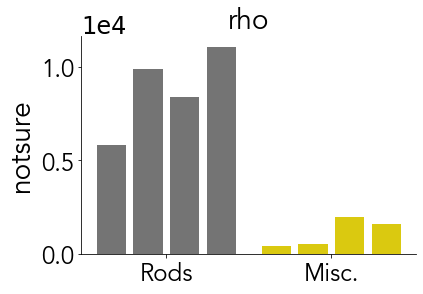

In [16]:
genename = 'rho'
n,h = plotBars_rods(genename)
fH, ax = plt.subplots()
pH = plt.bar(n, h, width=0.8, bottom=None, align='center', data=None, color=rC['plt'])
formatFigure_rods(genename, fH, ax, pH)

# plt.savefig("{0}.svg".format(genename), transparent=True, format="svg")

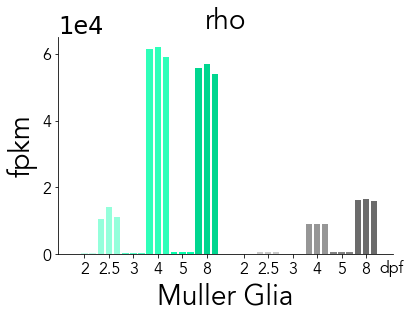

In [17]:
genename = 'rho'
n,h = plotBars_glia(genename)
fH, ax = plt.subplots()
pH = plt.bar(n, h, width=0.8, bottom=None, align='center', data=None, color=gC['plt'])

formatFigure_glia(genename, fH, ax, pH)

In [102]:
# gdf = findgenelist('aldh1')
gdf = findgenelist_rods('ankrd33')
# gdf = gdf.sort_values(by=["baseMean"],ascending=False)
# gdf = gdf[gdf.baseMean > 3]
# gdf = gdf.drop(np.arange(20,93))
# gdf = gdf.drop([4,24])
# gdf = gdf.sort_values(by=["symbol"])
gdf = gdf.sort_values(by=["padj"])

gdf

,symbol,genename,log2FoldChange,baseMean,LR,pvalue,padj,GFPpos1,GFPpos2_2,GFPpos2,GFPpos5_2,GFPneg1,GFPneg2,GFPneg2_2,GFPneg5_2
1,ankrd33ab,ankyrin repeat domain 33Ab,-3.1360,6.2867,99.0115,0.0000,0.0000,6.767075,22.895412,10.289735,23.761457,99.029447,66.590621,255.268570,139.500054
2,ankrd33ba,ankyrin repeat domain 33ba,2.1552,4.1578,25.0634,0.0000,0.0000,34.963221,5.623435,56.593545,12.397282,6.792634,15.875910,0.000000,3.975390
0,ankrd33aa,ankyrin repeat domain 33Aa,-1.9679,3.4863,16.6972,0.0000,0.0006,3.759486,6.828456,1.714956,3.099320,12.870253,3.086982,41.676501,16.262960
3,ankrd33bb,ankyrin repeat domain 33Bb,-1.1020,4.2182,9.9003,0.0017,0.0128,12.782253,16.066956,5.879849,12.397282,25.919260,14.993915,28.363174,29.273327


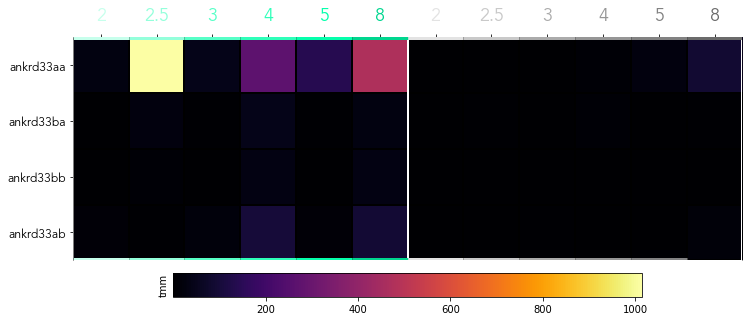

In [84]:
genenames = gdf['symbol'].values
samplenames = [] #skipping names to replace in intaglio
data = gdf.iloc[0:,5:41]

# log2matrix = np.vectorize(log2)
# data.iloc[0:,0:] = log2matrix(gdf.iloc[0:,5:41].values)

fig, ax = plt.subplots(figsize=[12,12])
im, cbar = heatmap_glia(data, genenames, samplenames, ax=ax,
                   cmap="inferno", cbarlabel="tmm")
# texts = annotate_heatmap(im, valfmt="{x:.1f} t")

# plt.savefig("{0}.svg".format(plotName), transparent=True, format="svg")
plt.show()

In [ ]:
log2matrix(gdf.iloc[0:,5:41].values)

In [140]:
# gdf = findgenelist('aldh1')
gdf = findgenelist_rods('elovl')
# gdf = gdf.sort_values(by=["baseMean"],ascending=False)
# gdf = gdf[gdf.baseMean > 3]
# gdf = gdf.drop(np.arange(20,93))
# gdf = gdf.drop([4,24])
gdf = gdf.sort_values(by=["symbol"])
# gdf = gdf.sort_values(by=["padj"])
gdf

,symbol,genename,log2FoldChange,baseMean,LR,pvalue,padj,GFPpos1,GFPpos2_2,GFPpos2,GFPpos5_2,GFPneg1,GFPneg2,GFPneg2_2,GFPneg5_2
0,elovl1b,elongation of very long chain fatty acids (FEN...,-3.0076,1.1683,10.5797,0.0011,0.0095,0.939872,0.401674,0.244994,0.000000,4.468838,2.645985,2.315361,2.529794
1,elovl2,elongation of very long chain fatty acids (FEN...,1.1225,1.8805,2.2242,0.1359,0.3370,9.022767,2.008369,2.939924,2.324490,3.396317,1.322992,0.000000,2.891193
2,elovl4a,elongation of very long chain fatty acids (FEN...,0.2350,1.8194,0.1016,0.7499,0.8807,3.571512,2.811717,1.469962,4.648981,5.541359,1.984489,2.315361,1.084197
3,elovl4b,elongation of very long chain fatty acids (FEN...,1.6484,7.2091,41.4521,0.0000,0.0000,187.410386,234.577557,263.613221,208.171024,65.960047,63.503639,87.983725,67.943032
4,elovl5,"ELOVL family member 5, elongation of long chai...",-1.1398,3.4606,3.5952,0.0579,0.1925,7.143024,6.426782,4.654880,4.648981,18.769119,24.916358,1.736521,14.094565
5,elovl6,"ELOVL family member 6, elongation of long chai...",-0.5910,4.3566,2.8926,0.0890,0.2567,13.722125,19.682021,15.924590,14.721772,25.382999,20.947381,20.259410,29.273327


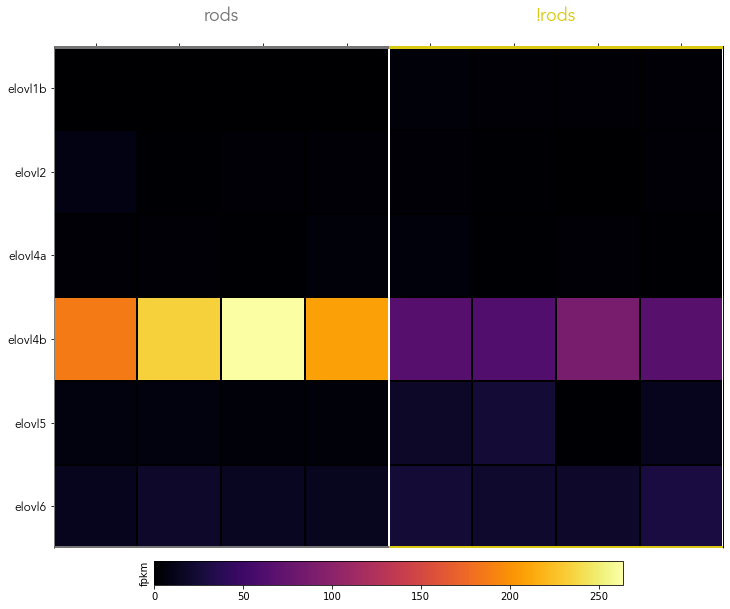

In [141]:
genenames = gdf['symbol'].values
samplenames = [] #skipping names to replace in intaglio
data = gdf.iloc[0:,7:16]

# log2matrix = np.vectorize(log2)
# data.iloc[0:,0:] = log2matrix(gdf.iloc[0:,5:41].values)

fig, ax = plt.subplots(figsize=[12,12])
im, cbar = heatmap_rods(data, genenames, samplenames, ax=ax,
                   cmap="inferno", cbarlabel="fpkm")
# texts = annotate_heatmap(im, valfmt="{x:.1f} t")

# plt.savefig("{0}.svg".format(plotName), transparent=True, format="svg")
plt.show()

### Script to create modified table with DEG analysis from 192hpf and baseMean using only MG192 samples

In [ ]:
# df_tmm = pd.read_csv("~/Documents/LiLab/RNAseq/zfMullerGlia_2018Charlton/glia_23615_sup-0006-tables2.csv")
# # get rid of non-existing symbols
# df_tmm.symbol.fillna(df_tmm['symbol_g10'], inplace=True)
# df_tmm.symbol.fillna(df_tmm['ensemblID'], inplace=True)

# df_deg = pd.read_csv("~/Documents/LiLab/RNAseq/zfMullerGlia_2018Charlton/Table1_192hpf.csv")
# # sort DEG frame
# df_deg = df_deg.set_index('ensemblID')
# df_deg = df_deg.reindex(index=df_tmm['ensemblID'])
# df_deg = df_deg.reset_index()


# df = df_tmm.copy()

# df.drop(columns=['ensemblID', 'symbol_g10','GOid'], inplace=True)
# df['log2FoldChange'] = df_deg['logFC']
# df['baseMean'] = np.power(2,df_deg['logCPM'])
# df['padj'] = df_deg['PValue']

# df = df[['symbol', 'genename', 'log2FoldChange','baseMean', 'padj', 
#            '48MG1', '48MG2', '48MG3', '60MG1', '60MG2', '60MG3', '72MG1',
#            '72MG2', '72MG3', '96MG1', '96MG2', '96MG3', '120MG1', '120MG2',
#            '120MG3', '192MG1', '192MG2', '192MG3', '48C1', '48C2', '48C3', '60C1',
#            '60C2', '60C3', '72C1', '72C2', '72C3', '96C1', '96C2', '96C3', '120C1',
#            '120C2', '120C3', '192C1', '192C2', '192C3', 
#           ]]
# df.iloc[:,5:] = np.power(2,df.iloc[:,5:])
# df.to_csv('~/Documents/LiLab/RNAseq/zfMullerGlia_2018Charlton/glia8dpf_DEGcounts.csv', index=False)
# df.head()


### Script to create modified table with DEG analysis for microglia dataset (Mitchell, 2018)